In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import io

In [5]:
file_path= "C:/Users/DELL/Desktop/Erdos fresh/listings_mar7_2023.csv"

In [6]:
listings= pd.read_csv(file_path,parse_dates=['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review'])

In [52]:
#  Getting the top 5 records
 
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [7]:
listings.shape

(42451, 75)

In [53]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            42451 non-null  int64         
 1   listing_url                                   42451 non-null  object        
 2   scrape_id                                     42451 non-null  int64         
 3   last_scraped                                  42451 non-null  datetime64[ns]
 4   source                                        42451 non-null  object        
 5   name                                          42449 non-null  object        
 6   description                                   41701 non-null  object        
 7   neighborhood_overview                         24957 non-null  object        
 8   picture_url                                   42451 non-null  obje

In [54]:
# There are no duplicates in the data

listings.duplicated().sum()

0

**Location columns EDA** <br>

We wil not be using **neighbourhood** column since it has 41% null values. We will Also remove neighbourhood_overview since we are not doing any text analysis in our project. For location we will be  only looking at cleansed, group_cleansed and latitude and longitude columns. <br>
 7   neighborhood_overview                         24957 non-null  object        
 27  neighbourhood                                 24958 non-null  object        
 28  neighbourhood_cleansed                        42451 non-null  object        
 29  neighbourhood_group_cleansed                  42451 non-null  object
 30  latitude                                      42451 non-null  float64       
 31  longitude                                     42451 non-null  float64 

In [55]:
listings.drop(['neighbourhood','neighborhood_overview'], axis=1, inplace=True)

**Dropping records where host name is not available** <br>
Where host name is not available, the profile of these host don't exist when we click on the url in the host url section. Therefore couldn't be scraped. <br>
 11  host_name                                     42449 non-null  object        
 12  host_since                                    42449 non-null  datetime64[ns]

In [56]:
# Filtering the dataset to exclude rows where host name is blank

listings= listings[~listings.host_name.isna()]

**number_of_reviews columns EDA**

 56  number_of_reviews                             42451 non-null  int64         
 57  number_of_reviews_ltm                         42451 non-null  int64         
 58  number_of_reviews_l30d                        42451 non-null  int64 

number_of_reviews_ltm and number_of_reviews_l30d are nearly same because number of reviews last month and number of reviews in last 30 days. Which is nearly same because the data was scarped on 7th March. Keeping all the 3 columns here since they have non null values and are helpful to price prediciton. 

**Review ratings columns EDA** <br>
 61  review_scores_rating                          30780 non-null  float64       
 62  review_scores_accuracy                        30531 non-null  float64       
 63  review_scores_cleanliness                     30533 non-null  float64       
 64  review_scores_checkin                         30526 non-null  float64       
 65  review_scores_communication                   30532 non-null  float64       
 66  review_scores_location                        30524 non-null  float64       
 67  review_scores_value                           30522 non-null  float64

 If a host has canceled they automatically have rating value. In the review_scores_rating  where the value isn't zero and is like 4.91, 5, these airbnbs belong to airbnb luxe which doesn't have separte ratings like cleanliness, accuracy therefore all these columns are blanks. For the ease of analysis we will not be including hosts which have cancelled or have. Imputing 0 will only refer to those airbnbs which have never been booked. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_43652\4237789636.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings.review_scores_rating, hist=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_43652\4237789636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings.re

<AxesSubplot: xlabel='review_scores_value', ylabel='Density'>

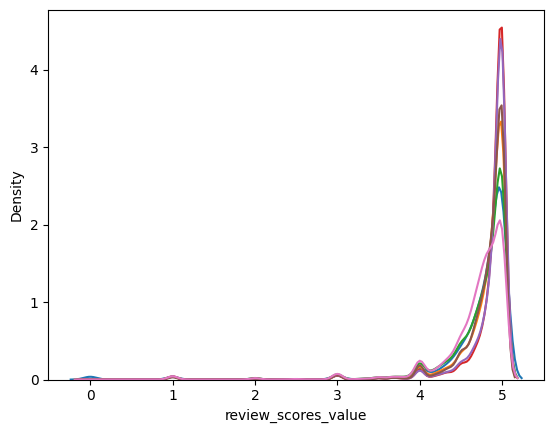

In [57]:
# All review columns nearly have the same distribtuion and the density differnce exists due to more missing 
# records in rest  of the columns compared to review_scores_rating. So we will take only review score rating and
# will drop the rest of the columns. 

sns.distplot(listings.review_scores_rating, hist=False)
sns.distplot(listings.review_scores_accuracy, hist=False)
sns.distplot(listings.review_scores_cleanliness, hist=False)
sns.distplot(listings.review_scores_checkin, hist=False)
sns.distplot(listings.review_scores_communication, hist=False)
sns.distplot(listings.review_scores_location, hist=False)
sns.distplot(listings.review_scores_value, hist=False)


In [58]:
# Example to show that 0 rating means that the host canceled. Will have an automatic response review and therefore the number of 
# reviews won't be 0. 

listings[(listings.review_scores_rating==0)].head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
145,39225953,https://www.airbnb.com/rooms/39225953,20230307175359,2023-03-09,city scrape,"Super clean, big and comfortable room in LA ce...",NaN,https://a0.muscache.com/pictures/6c3bf299-d37e...,41273097,https://www.airbnb.com/users/show/41273097,...,NaN,NaN,NaN,NaN,t,1,0,0,1,0.02
478,38883702,https://www.airbnb.com/rooms/38883702,20230307175359,2023-03-08,previous scrape,Private room queen bed,NaN,https://a0.muscache.com/pictures/458495d8-6fff...,296002006,https://www.airbnb.com/users/show/296002006,...,NaN,NaN,NaN,NaN,f,2,0,2,0,0.02
604,26363881,https://www.airbnb.com/rooms/26363881,20230307175359,2023-03-08,previous scrape,"Studio 5 min from Rose Bowl & Oldtown, 20min DLTA",NaN,https://a0.muscache.com/pictures/e4170712-f561...,50016597,https://www.airbnb.com/users/show/50016597,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
962,33018860,https://www.airbnb.com/rooms/33018860,20230307175359,2023-03-09,city scrape,Architectural Gem Guest House in old town Pasa...,A Historic Monterrey Colonial Revival designed...,https://a0.muscache.com/pictures/584449c6-a4c0...,2088777,https://www.airbnb.com/users/show/2088777,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
1178,6016761,https://www.airbnb.com/rooms/6016761,20230307175359,2023-03-08,previous scrape,Charming Beverly Hills Getaway,Private and quaint one bedroom in a 3bd 2bath ...,https://a0.muscache.com/pictures/76068227/65e3...,31231073,https://www.airbnb.com/users/show/31231073,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01


In [59]:
# Price  column cleaning

# Code to remove dollar sign and , from prices to turn it from object dtype to float.  

listings['price'] = listings['price'].replace({r'\$':''},regex = True).replace({r',':''},regex = True).astype('float')

<AxesSubplot: >

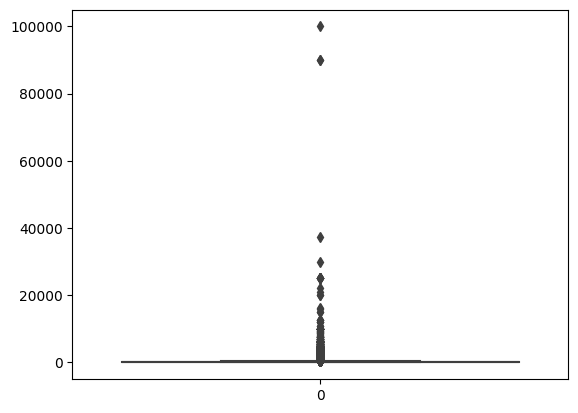

In [60]:
sns.boxplot(listings.price)

<AxesSubplot: xlabel='price', ylabel='Density'>

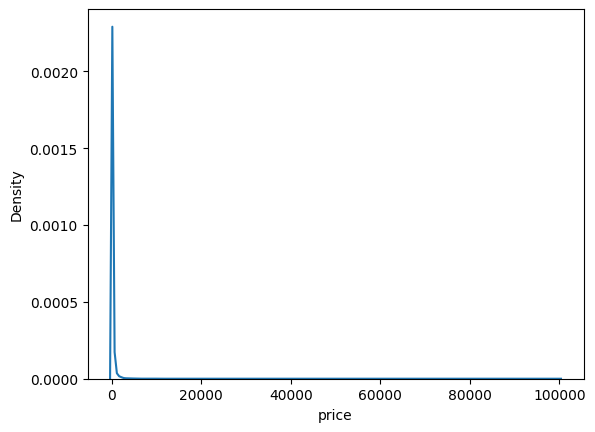

In [61]:
sns.kdeplot(listings.price)

In [62]:
(listings[listings.price>800].shape[0]/listings.shape[0])*100
# Only 4.85% of the listings have prices greater than $800. So we will drop these listings. 

4.845814977973569

In [63]:
listings= listings[listings.price<800]
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40330 entries, 0 to 42450
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            40330 non-null  int64         
 1   listing_url                                   40330 non-null  object        
 2   scrape_id                                     40330 non-null  int64         
 3   last_scraped                                  40330 non-null  datetime64[ns]
 4   source                                        40330 non-null  object        
 5   name                                          40328 non-null  object        
 6   description                                   39725 non-null  object        
 7   picture_url                                   40330 non-null  object        
 8   host_id                                       40330 non-null  int6

**Host Columns EDA**<br>


 5   host_id                                       40330 non-null  int64         
 6   host_url                                      40330 non-null  object        
 7   host_name                                     40330 non-null  object        
 8   host_since                                    40330 non-null  datetime64[ns]

 9   host_location                                 32332 non-null  object        
 10  host_about                                    23582 non-null  object        
 11  host_response_time                            31446 non-null  object        
 12  host_response_rate                            31446 non-null  object        
 13  host_acceptance_rate                          32458 non-null  object        
 14  host_is_superhost                             40304 non-null  object        
 15  host_thumbnail_url                            40330 non-null  object        
 16  host_picture_url                              40330 non-null  object        
 17  host_neighbourhood                            31854 non-null  object        
 18  host_listings_count                           40330 non-null  float64       
 19  host_total_listings_count                     40330 non-null  float64       
 20  host_verifications                            40330 non-null  object        
 21  host_has_profile_pic                          40330 non-null  object        
 22  host_identity_verified                        40330 non-null  object

 Out of these columns, we are choosing only host identiy verifies, host_is_superhost

In [64]:
# Property type has a number of values so we will not split by Property type 

listings.property_type.value_counts().shape                         

(104,)

In [65]:
#Room type has a less cardinality so we will split data by room type 

listings.room_type.value_counts()

Entire home/apt    27515
Private room       12053
Shared room          684
Hotel room            78
Name: room_type, dtype: int64

In [66]:
# removing some columns which are either completely blank or not useful to the analysis

listings.drop(columns=['id', 'scrape_id', 'last_scraped', 'source', 'bathrooms', 'calendar_updated'], inplace=True)

In [67]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40330 entries, 0 to 42450
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   40330 non-null  object        
 1   name                                          40328 non-null  object        
 2   description                                   39725 non-null  object        
 3   picture_url                                   40330 non-null  object        
 4   host_id                                       40330 non-null  int64         
 5   host_url                                      40330 non-null  object        
 6   host_name                                     40330 non-null  object        
 7   host_since                                    40330 non-null  datetime64[ns]
 8   host_location                                 32332 non-null  obje

In [68]:
df_null = pd.DataFrame(listings.isna().sum()).reset_index()

In [69]:
df_null.columns = ['Column name', 'Number of missings']
df_null

,Column name,Number of missings
0,listing_url,0
1,name,2
2,description,605
3,picture_url,0
4,host_id,0
...,...,...
62,calculated_host_listings_count,0
63,calculated_host_listings_count_entire_homes,0
64,calculated_host_listings_count_private_rooms,0
65,calculated_host_listings_count_shared_rooms,0


In [70]:
listings.host_response_time.value_counts()

within an hour        24905
within a few hours     4048
within a day           1950
a few days or more      543
Name: host_response_time, dtype: int64

**license column EDA**

In [9]:
listings.license.isna().sum()

30509

In [8]:
listings.license.value_counts()

Exempt - This listing is a transient occupancy residential structure    2419
Exempt - This listing is a bed and breakfast                             470
Exempt                                                                   439
Exempt - This listing is a hotel or motel                                246
HSR19-004485                                                              26
                                                                        ... 
HSR21-003258                                                               1
NRP21-00283                                                                1
HSR21-003343                                                               1
HSR19-005452                                                               1
HSR23-000454                                                               1
Name: license, Length: 6766, dtype: int64

<AxesSubplot: xlabel='room_type', ylabel='price'>

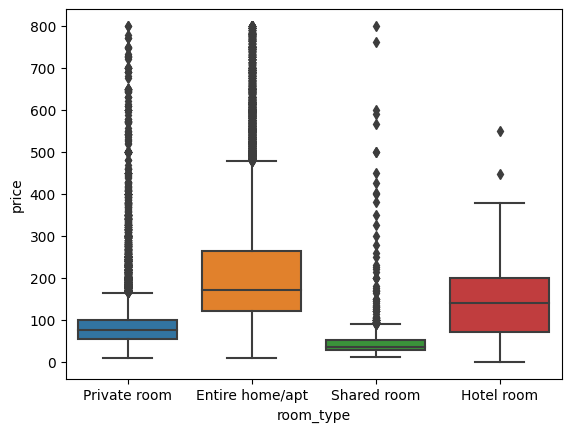

In [72]:
# create grouped boxplot 
sns.boxplot(x = listings.room_type,
            y = listings.price,
            )
# Clearly Entire home apt have higher price than any other room type.

In [73]:
# Creating a license colum to check effect on price 
# Have to also include extemped in 0 category 


listings['license_yn']= pd.Series(np.where(((listings.license.isna()) | (listings.license.str.lower().str.contains('exempt', regex=True))),0,1))

In [74]:
listings.license_yn.value_counts()

0.0    31234
1.0     7109
Name: license_yn, dtype: int64

In [75]:
# Creating datasets based on different room types: 

df_private= listings[listings.room_type=='Private room']
df_entire= listings[listings.room_type=='Entire home/apt']
df_shared= listings[listings.room_type=='Shared room']
df_hotel= listings[listings.room_type=='Hotel room']

<AxesSubplot: xlabel='license_yn', ylabel='price'>

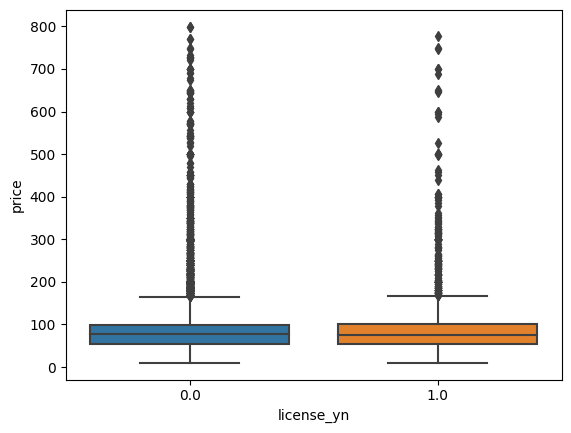

In [76]:
sns.boxplot(x=df_private.license_yn, y=df_private.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

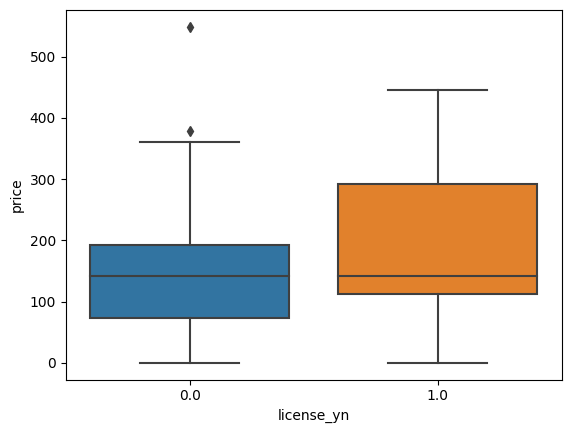

In [77]:
sns.boxplot(x=df_hotel.license_yn, y=df_hotel.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

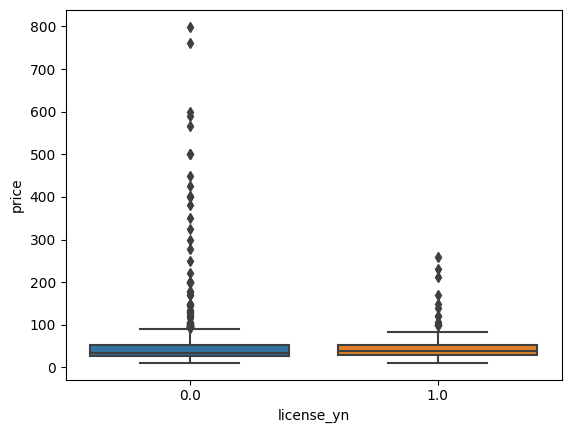

In [78]:
sns.boxplot(x=df_shared.license_yn, y=df_shared.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

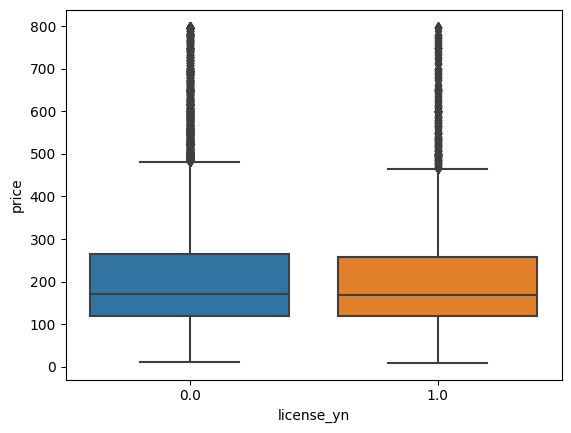

In [79]:
sns.boxplot(x=df_entire.license_yn, y=df_entire.price)

In [80]:
# Cleaning the name column which has hotel in the name but has private room in datatype

listings.room_type= np.where(listings.name.str.lower().str.contains('motel', regex=False) == True,'Hotel room', listings.room_type)
listings.room_type= np.where(listings.name.str.lower().str.contains('hotel', regex=False) == True,'Hotel room', listings.room_type)


In [81]:

listings.columns

Index(['listing_url', 'name', 'description', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
      

**Important columns for pricing based on seller perspective for prices  from
the above EDA:**

1. For identification<br>
'id', 'listing_url', 'name'

2. Host related columns<br>
 'host_id','host_url', 'host_name','host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', host_verifications

3. Location wise<br>
'latitude', 'longitude', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'

4. Based on property:<br>
'bedrooms', 'beds', 'property_type', 'room_type', 'accommodates', license_yn, 
'amenities', 'price, 'maximum_nights', 'minimum_minimum_nights', instant_bookable                              

5. Based on reviews<br>
'number_of_reviews','number_of_reviews_ltm','review_scores_value', 'number_of_reviews_l30d', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location', 
'reviews_per_month'

6. Number of listings by host<br>
'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'

In [82]:
listings= listings[~listings.beds.isna()&~listings.reviews_per_month.isna()&~listings.review_scores_accuracy.isna()&~listings.review_scores_checkin.isna()
         &~listings.review_scores_communication.isna()&~listings.review_scores_location.isna()&~listings.review_scores_value.isna()]

In [ ]:
listings= listings[['id', 'listing_url','name','host_id', 'host_url', 'host_name', 'host_since',  'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights','has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'license_yn']]

In [84]:
# We have reduced the number of columns from 75 to 68 and kept columns which are useful to our analysis. 

listings.shape

(29053, 68)

In [86]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29053 entries, 1 to 42450
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   29053 non-null  object        
 1   name                                          29053 non-null  object        
 2   description                                   28766 non-null  object        
 3   picture_url                                   29053 non-null  object        
 4   host_id                                       29053 non-null  int64         
 5   host_url                                      29053 non-null  object        
 6   host_name                                     29053 non-null  object        
 7   host_since                                    29053 non-null  datetime64[ns]
 8   host_location                                 23995 non-null  obje

In [99]:
top_10_neigbourhood= listings.groupby('neighbourhood_cleansed').price.sum().reset_index().sort_values(['price'], ascending=False).head(10)

Text(0, 0.5, 'Price')

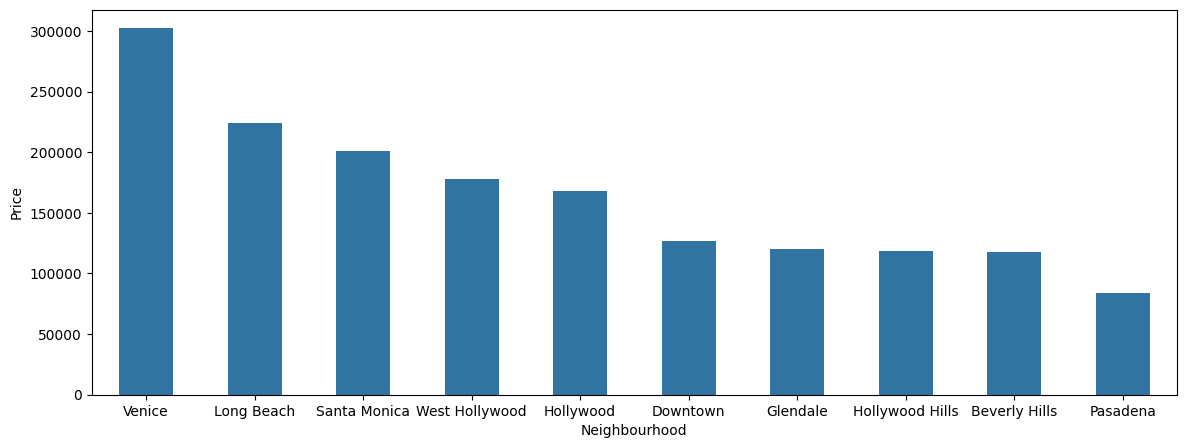

In [133]:
plt.figure(figsize=(14,5))

sns.barplot(x=top_10_neigbourhood.neighbourhood_cleansed,y=top_10_neigbourhood.price, color='#1f77b4', width=0.5)

plt.xlabel('Neighbourhood')
plt.ylabel('Price')